# Cluster Analysis Methodology

![](banner_cluster_analysis.jpg) 


_<p style="text-align: center;"> The platypus lays eggs like a bird does and produces milk like a mammal does. </p>_

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

Cluster analysis methods construct models that organize data into distinct classes.

## Introduction

The platypus is a remarkable animal.  It's characterized by a combination of features that suggest it could belong to any of a few different animal classes.  It lays eggs and has a bill like a bird does.  It produces milk and has fur like a mammal does.  The male platypus also carries venomous spikes on its feet, not common for either birds or mammals.  Which animal class best suits the platypus?  More generally, how should animals be organized into classes?  How many different animal classes should there be?  Which combinations of features should be considered?  What criteria should be used to determine whether animals are similar or dissimilar?  What is the benefit of organizing animals into classes?

Cluster analysis methods organize data into distinct classes in some way that distiguishes how observations differ from each other.  Some observations will belong to one class, other observations will belong to another class, and still other observations will belong to other classes.

Cluster analysis is useful in a variety of business applications, notably market segmentation.  You may want to treat all your customers as individuals.  For example, you may want to advertise to each individual customer in a way that specially targets that customer, or you may want to build a product for each individual customer that is specially designed for that customer's needs, or provide a custom service to each individual customer.  If your business is, say, a management consulting firm with only six clients, then you may be able to do that.  However, if you have limited resources (as all businesses do) and many customers, that may not be practical.  Rather, you can conduct a market segmentation, assigning some customers to one class and other customers to other classes.  Then treat one class of customers one way and other classes in different ways.  Assuming that customers in one class are all similar to each other and customers in other classes are dissimilar, then making business decisions about advertising, product development, or service provision based on market segmentation is often a good approach.

Let's consider more carefully how we might distinguish different types of customers so to assign them to different classes.  There are certainly many features we could employ.  Income level may be a reasonable feature to employ when making a business decision about product development: build an inexpensive product for customers in a low income class and build an expensive product for customers in a high income class.  Age may also be a reasonable feature to employ: build a product for young customers and another product for mature customers.  When we consider the combination of income level and age, though, we're led to building four products: one product for low-income young customers, one for low-income mature customers, one for high-income young customers, and one for high-income mature customers.  When we consider combinations of even more features, we're led to building an increasing number of products, which quickly becomes not practical.  Restricting ourselves to a limited number of classes and corresponding limited number of products could result in some similar customers being split across different classes, like having some low-income customers in one class and other low-income customers in another class.  But, we still want the customers in any one class to be relatively similar to each other and customers in other classes to be relatively dissimilar.  We need cluster analysis to determine sensible classes when we want to consider many features but are limited to few classes.

There are several popular cluster analysis methods, including hierarchical agglomeration, k-means, and Gaussian mixture modeling with expectation-maximization.

## Lesson Plan

We'll first overview the cluster analysis methodology, which comprises processes for construction and evaluation.  Then we'll demonstrate the methodology applied to pedagogical data, resulting in a few 1-variable, 2-variable, and 3-variable cluster models.  Then we'll see a few different cluster models constructed from the same data - this to reenforce that there is no single correct cluster model, but rather only cluster models of various quality.  Then we'll formalize the notions of similarity and dissimilarity between observations and classes, and see how to use that to evaluate the quality or usefulness of cluster models.  We'll end with a discussion of the business value of cluster models and some thoughts about sensitivity analysis.

## Terminology

Here are some new terms that we will use in our discourse.

Cluster analysis is a kind of **descriptive data analytics**, also known as **descriptive data mining**, also known as **unsupervised machine learning**.  Descriptive data analytic methods construct descriptive models that potentially expose interesting relationships in data.

A **cluster analysis method** constructs a cluster model from some reference data.

A **cluster model** is a kind of descriptive model that exposes similarity/dissimilarity among observations by organizing the observations into separate classes.

**Construction** is the process of constructing a model from some reference data.  **Evaluation** is the process of assessing the quality or usefulness of a model.

The **dispersion ratio** of a cluster model is a way to measure of the quality or usefulness of the model.

## Cluster Analysis Methodology

Cluster analysis comprises construction and evaluation.  Construction is about constructing a cluster model based on some unclassified reference data.  Evaluation is about evaluating the quality of a cluster model.

Note that cluster analysis in some contexts is referred to as unsupervised machine learning.  Cluster model construction in some contexts is referred to as training, modeling, building a model, or fitting a model.

### Construction

For construction, use some cluster analysis method that receives an unclassified reference dataset as input and generates a cluster model as output.  Most cluster analysis methods expose hyperparameters that you can set to configure specific versions of behavior.  The form of the unclassified reference data is a dataset comprising several observations, each described by several numeric variables.  The form of the cluster model is the reference dataset augmented by one additional class variable, which indicates to which clusters the observations are assigned.

Here we see an unclassified reference dataset with five observations and eight numeric variables.  The cluster analysis method is configured to specific behavior by you setting the hyperparameters.  The method outputs a cluster model, comprising the five observations now classified into two classes A and B.  The first, second, and fifth observations are assigned to class A.  The third and fourth observations are assigned to class B.

We don't know whether this cluster analysis method applied to this reference data generated a good model until we evaluate it.

<table style="border:1px solid; margin-top:20px">
    <caption style="text-align:center">Construct a Cluster Model</caption>
    <tr><td style="padding:20px; background-color:white"><img src="cluster_train.jpg" width=440></td></tr>
</table><br clear=all>

### Evaluation

For evaluation, use some method that receives a cluster model as input and generates a score as output.  The method reflects some specific criteria some quality scale.  Often, the criteria will involve measures of how similar observations in any one class are to each other and how dissimilar observations in the other classes are.

Here we see a cluster model with five observations.  The method outputs a score of 0.5 on the AIC scale. 

<table style="border:1px solid; margin-top:20px">
    <caption style="text-align:center">Evaluate a Cluster Model</caption>
    <tr><td style="padding:20px; background-color:white"><img src="cluster_evaluate.jpg" width=440></td></tr>
</table><br clear=all>

## Demonstration of Methodology

Let's see the cluster analysis methodology realized with a few 1-variable, 2-variable, and 3-variable cluster models.  

### Data

Consider this pedagogical data.

In [2]:
data = data.frame(name=letters[1:8], x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
fmt(data)

data 
 
 
 name 
 x1 
 x2 
 x3 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 
 
 b 
 2.5 
 9.0 
 9.0 
 
 
 c 
 4.0 
 8.5 
 10.5 
 
 
 d 
 6.5 
 11.0 
 2.0 
 
 
 e 
 8.0 
 2.5 
 1.5 
 
 
 f 
 9.0 
 1.0 
 1.0 
 
 
 g 
 10.0 
 4.0 
 9.5 
 
 
 h 
 10.5 
 7.5 
 11.0

Here is the data in normalized representation. Normalizations of `x1`, `x2`, and `x3` have been added as synthetic variables `z1`, `z2`, and `z3`, respectively.  Recall that normalizing a variable effectively makes it unitless, specifically makes it the number of standard deviations from the mean.  We'll see later why it's useful to have the data in normalized representation.

In [3]:
data = data.frame(name=letters[1:8], x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
data = setNames(cbind(data, scale(data[, c("x1","x2","x3")])), c(names(data), c("z1","z2","z3")))
fmt(data)

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165

Here is the data with a synthetic class variable added.  Note that class values are initially unknown.

In [4]:
data = data.frame(name=letters[1:8], x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
data = setNames(cbind(data, scale(data[, c("x1","x2","x3")])), c(names(data), c("z1","z2","z3")))
data$class = NA
fmt(data)

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 NA 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 NA 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 NA 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 NA 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 NA 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 NA 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 NA 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 NA

### Cluster Model in 1 Variable

We can build cluster models from the data by considering just one variable, say `z1`.

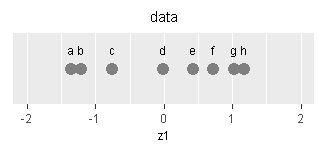

In [5]:
output_size(2.7,1.25)
ggplot(data) + ggtitle("data") +
xlim(-2,2) + geom_point(aes(x=z1, y=""), color="gray50") + geom_text(aes(x=z1, y="", label=name)) +
theme.x_axis_only
output_size(restore)

Perhaps we need only partition observations into 2 classes without any special assignment criteria.  Here is such a cluster model derived from random assignments.  Class A comprises the 3 observations c, f, g. Class B comprises the 5 observations a, b, d, e, h. 

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 B 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 B 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 B 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 B 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 A 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 A 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 B

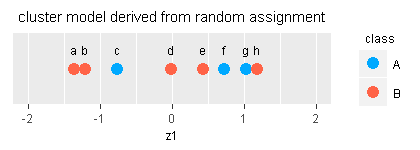

In [6]:
data$class = c("B","B","A","B","B","A","A","B")
fmt(data)

output_size(3.5,1.25)
ggplot(data) + ggtitle("cluster model derived from random assignment") + 
xlim(-2,2) + geom_point(aes(x=z1, y="", color=class)) + geom_text(aes(x=z1, y="", label=name)) +
theme.x_axis_only + theme.legend_title
output_size(restore)

Perhaps it would be more useful for us to partition observations into 2 classes according to their proximity to other observations. Here is such a model derived from the `z1` variable.  Class A comprises the 3 observations a, b, c, which are closer to each other than they are to Class B observations.  Class B comprises the 5 observations d, e, f, g, h, which are closer to each other than they are to Class A observations.

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 B 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 B 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 B 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 B 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 B

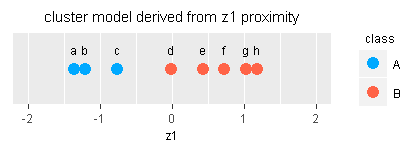

In [7]:
data$class = c("A","A","A","B","B","B","B","B")
fmt(data)

output_size(3.5,1.25)
ggplot(data) + ggtitle("cluster model derived from z1 proximity") +
xlim(-2,2) + geom_point(aes(x=z1, y="", color=class)) + geom_text(aes(x=z1, y="", label=name)) +
theme.x_axis_only + theme.legend_title
output_size(restore)

### Cluster Model in 2 Variables

We can build cluster models from the data by considering just two variables, say `z1` and `z2`, taken one at at time.

The distribution of `z1` values suggests perhaps 2 classes assigned according to proximity.  Here is such a cluster model derived from only the `z1` variable. Class A comprises observations a, b, c. Class B comprises observations d, e, f, g, h.

The distribution of `z2` values also suggests perhaps 2 classes assigned according to proximity.  However, the arrangement of observations in the `z2` dimension is different than in the `z1` dimension.  So, here is another cluster model from the data, this one derived from only the `z2` variable.  Class A comprises observations a, e, f, g. Class B comprises observations b, c, d, h.

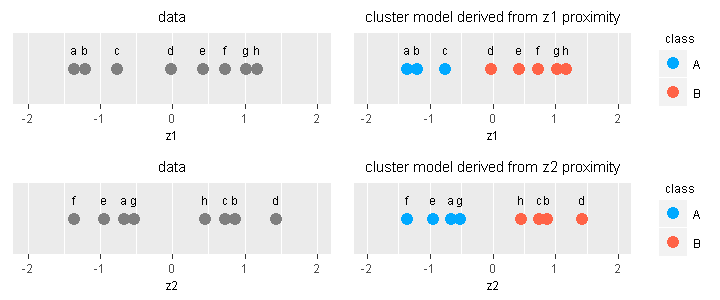

In [8]:
output_size(6,2.5)

p1 = ggplot(data) + ggtitle("data") +
     xlim(-2,2) + geom_point(aes(x=z1, y=""), color="gray50") + geom_text(aes(x=z1, y="", label=name)) +
     theme.x_axis_only

data$class = c("A","A","A","B","B","B","B","B")
p2 = ggplot(data) + ggtitle("cluster model derived from z1 proximity") +
     xlim(-2,2) + geom_point(aes(x=z1, y="", color=class)) + geom_text(aes(x=z1, y="", label=name)) +
     theme.x_axis_only  + theme.legend_title

p3 = ggplot(data) + ggtitle("data") +
     xlim(-2,2) + geom_point(aes(x=z2, y=""), color="gray50") + geom_text(aes(x=z2, y="", label=name)) +
     theme.x_axis_only

data$class = c("A","B","B","B","A","A","A","B")
p4 = ggplot(data) + ggtitle("cluster model derived from z2 proximity") +
     xlim(-2,2) + geom_point(aes(x=z2, y="", color=class)) + geom_text(aes(x=z2, y="", label=name)) +
     theme.x_axis_only + theme.legend_title

grid.arrange(p1, p2, p3, p4, nrow=2, widths=c(3.6,4))

output_size(restore)

We can build cluster models from the data by considering just two variables, say `z1` and `z2`, taken in combination.  Note that proximity viewed in any one dimension looks different than proximity viewed in two dimensions.   

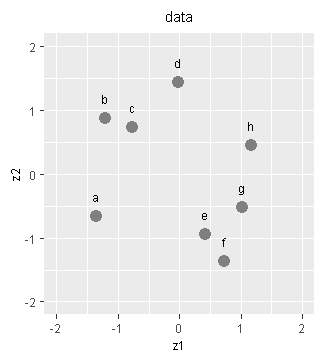

In [9]:
output_size(2.7,3)
ggplot(data) + ggtitle("data") +
xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z1, y=z2), color="gray50") + geom_text(aes(x=z1, y=z2, label=name))
output_size(restore)

The distributions of `z1` and `z2` taken in combination suggest perhaps different class assignments.  Here is such a cluster model with 2 classes derived from the `z1` and `z2` variables taken in combination.  Class A comprises observations a, b, c, d. Class B comprises observations e, f, g, h.

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 A 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 B 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 B 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 B 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 B

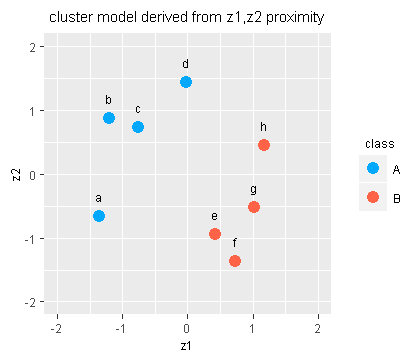

In [10]:
data$class = c("A","A","A","A","B","B","B","B")
fmt(data)

output_size(3.5, 3)
ggplot(data) + ggtitle("cluster model derived from z1,z2 proximity") +
xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z1, y=z2, color=class)) + geom_text(aes(x=z1, y=z2, label=name)) +
theme.legend_title
output_size(restore)

### Cluster Models in 3 Variables 

We can build cluster models from the data by considering just three variables, say `z1`, `z2`, and `z3`, taken one at a time.

The distribution of `z3` values suggests perhaps 2 classes assigned according to proximity.  However, the arrangement of observations in the `z3` dimension is different than in both the `z1` and `z2` dimensions.  So, here are three different cluster models: one derived from only the `z1` variable, another derived from the `z2` variable, and yet another derived from the `z3` variable.

In the model derived from the `z1` variable, Class A comprises observations a, b, c and Class B comprises observations d, e, f, g, h.

In the model derived from the `z2` variable, Class A comprises observations a, e, f, g and Class B comprises observations b, c, d, h.

In the model derived from the `z3` variable, Class A comprises observations d, e, f and Class B comprises observations a, b, c, g, h.

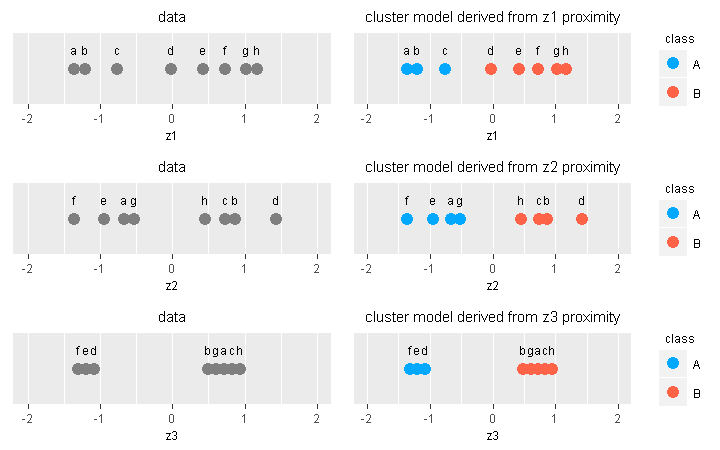

In [11]:
output_size(6,3.75)

p1 = ggplot(data) + ggtitle("data") +
     xlim(-2,2) + geom_point(aes(x=z1, y=""), color="gray50") + geom_text(aes(x=z1, y="", label=name)) +
     theme.x_axis_only

data$class = c("A","A","A","B","B","B","B","B")
p2 = ggplot(data) + ggtitle("cluster model derived from z1 proximity") +
     xlim(-2,2) + geom_point(aes(x=z1, y="", color=class)) + geom_text(aes(x=z1, y="", label=name)) +
     theme.x_axis_only + theme.legend_title

p3 = ggplot(data) + ggtitle("data") +
     xlim(-2,2) + geom_point(aes(x=z2, y=""), color="gray50") + geom_text(aes(x=z2, y="", label=name)) +
     theme.x_axis_only

data$class = c("A","B","B","B","A","A","A","B")
p4 = ggplot(data) + ggtitle("cluster model derived from z2 proximity") +
     xlim(-2,2) + geom_point(aes(x=z2, y="", color=class)) + geom_text(aes(x=z2, y="", label=name)) +
     theme.x_axis_only + theme.legend_title

p5 = ggplot(data) + ggtitle("data") +
     xlim(-2,2) + geom_point(aes(x=z3, y=""), color="gray50") + geom_text(aes(x=z3, y="", label=name)) +
     theme.x_axis_only

data$class = c("B","B","B","A","A","A","B","B")
p6 = ggplot(data) + ggtitle("cluster model derived from z3 proximity") +
     xlim(-2,2) + geom_point(aes(x=z3, y="", color=class)) + geom_text(aes(x=z3, y="", label=name)) +
     theme.x_axis_only + theme.legend_title

grid.arrange(p1, p2, p3, p4, p5, p6, nrow=3, widths=c(3.6,4))

output_size(restore)

We can build cluster models from the data by considering just two variables taken in combination.  Note that proximity viewed in any combination of two dimensions looks different than proximity viewed in another combination of two dimensions. 

Here is a cluster model with 2 classes derived from the `z1` and `z2` variables taken in combination.  Class A comprises observations a, b, c, d. Class B comprises observations e, f, g, h.

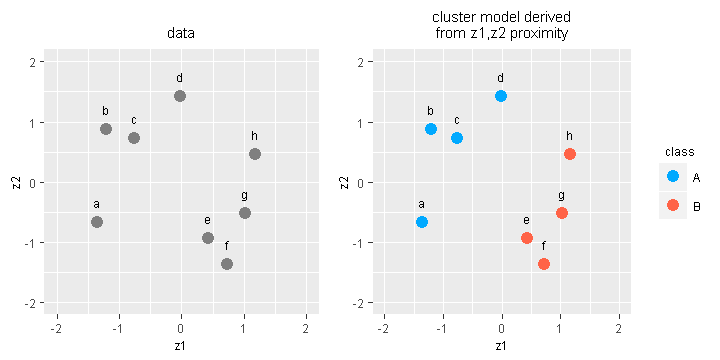

In [12]:
output_size(6,3)

p1 = ggplot(data) + ggtitle("\ndata") +
     xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z1, y=z2), color="gray50") + geom_text(aes(x=z1, y=z2, label=name))

data$class = c("A","A","A","A","B","B","B","B")
p2 = ggplot(data) + ggtitle("cluster model derived\nfrom z1,z2 proximity") +
     xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z1, y=z2, color=class)) + geom_text(aes(x=z1, y=z2, label=name)) +
     theme.legend_title

grid.arrange(p1, p2, nrow=1, widths=c(2.6, 3.1))

output_size(restore)

Here is a cluster model with 3 classes derived from the `z1` and `z3` variables taken in combination.  Class A comprises observations a, b, c. Class B comprises observations d, e, f.  Class C comprises observations g, h.

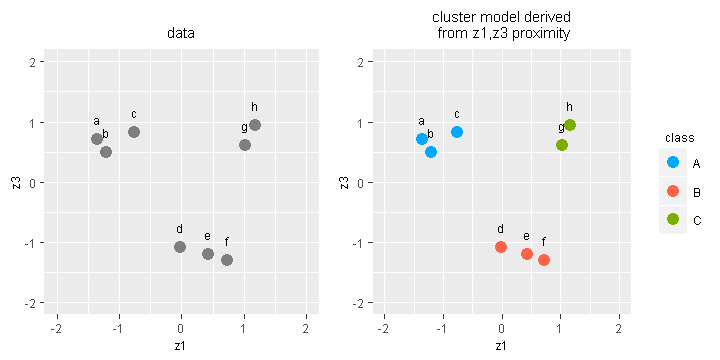

In [13]:
output_size(6,3)

p1 = ggplot(data) + ggtitle("\ndata") +
      xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z1, y=z3), color="gray50") + geom_text(aes(x=z1, y=z3, label=name))

data$class = c("A","A","A","B","B","B","C","C")
p2 = ggplot(data) + ggtitle("cluster model derived\n from z1,z3 proximity") +
     xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z1, y=z3, color=class)) + geom_text(aes(x=z1, y=z3, label=name)) +
     theme.legend_title

grid.arrange(p1, p2, nrow=1, widths=c(2.6, 3.1))

output_size(restore)

Here is a cluster model with 4 classes derived from the `z2` and `z3` variables taken in combination.  Class A comprises observations e, f. Class B comprises observations a, g.  Class C comprises observations b, c , h.  Class D comprises observation d.

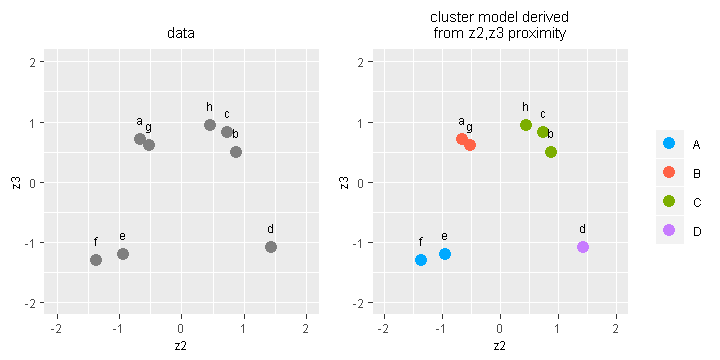

In [14]:
output_size(6,3)

p1 = ggplot(data) + ggtitle("\ndata") +
     xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z2, y=z3), color="gray50") + geom_text(aes(x=z2, y=z3, label=name))

data$class = c("B","C","C","D","A","A","B","C")
p2 = ggplot(data) + ggtitle("cluster model derived\nfrom z2,z3 proximity") +
     xlim(-2,2) + ylim(-2,2) + geom_point(aes(x=z2, y=z3, color=class)) + geom_text(aes(x=z2, y=z3, label=name))

grid.arrange(p1, p2, nrow=1, widths=c(2.6,3.1))

output_size(restore)

We can build cluster models from the data by considering just three variables, say `z1`, `z2`, and `z3`, taken in combination.  Note that proximity viewed in any two dimensions looks different than proximity viewed in three dimensions.

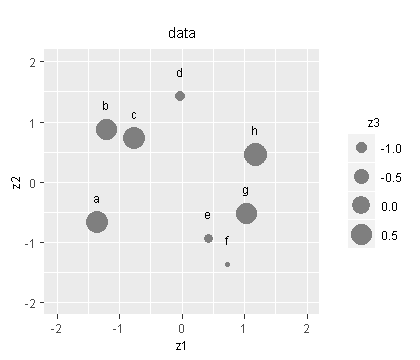

In [15]:
output_size(3.5,3)
ggplot(data) + ggtitle("\ndata") + 
xlim(-2,2) + ylim(-2,2) +
geom_point(aes(x=z1, y=z2, size=z3), color="gray50") + geom_text(aes(x=z1, y=z2, label=name), vjust=-2) +
theme.legend_title
output_size(restore)

The distributions of `z1`, `z2`, and `z3` taken in combination suggest perhaps different class assignments.  Here is such a cluster model with 4 classes derived from the `z1`, `z2`, and `z3` variables taken in combination.  Class A comprises observations a, b, c. Class B comprises observation d.  Class C comprises observations e, f.  Class D comprises observations g, h.

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 B 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 C 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 C 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 D 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 D

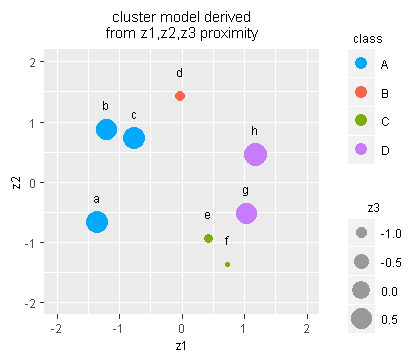

In [16]:
data$class = c("A","A","A","B","C","C","D","D")
fmt(data)

output_size(3.5,3)
ggplot(data) + ggtitle("cluster model derived\nfrom z1,z2,z3 proximity") +
xlim(-2,2) + ylim(-2,2) +
geom_point(aes(x=z1, y=z2, size=z3, color=class)) + geom_text(aes(x=z1, y=z2, label=name), vjust=-2) +
guides(size = guide_legend(override.aes=list(color=NEW_COLOR))) + theme.legend_title
output_size(restore)

Here is the cluster model visualized as some 3D scatterplot projections. 

In [17]:
p = open3d()
mfrow3d(nr=1, nc=3, sharedMouse=FALSE)

view3d(-20, -4, zoom=0.8)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,1,1,2,3,3,4,4)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
grid3d(c("x","y","z"))

next3d()
view3d(20, 4, zoom=0.8)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,1,1,2,3,3,4,4)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
grid3d(c("x","y","z"))

next3d()
view3d(0, 0, zoom=0.8)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,1,1,2,3,3,4,4)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
grid3d(c("x","y","z"))

rglwidget(width=900, height=300, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

## Many Possible Cluster Models

Here is a cluster model with 2 classes visualized as some 3D scatterplot projections.

In [18]:
p = open3d()
mfrow3d(nr=1, nc=3, sharedMouse=FALSE)

view3d(-20, -4, zoom=0.8)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,1,1,2,2,2,1,1)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
quads3d(c(-2,-2,2,2), c(-2,2,2,-2), c(0,0,0,0), color="gray50", alpha=0.3)
grid3d(c("x","y","z"))

next3d()
view3d(20, 4, zoom=0.8)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,1,1,2,2,2,1,1)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
quads3d(c(-2,-2,2,2), c(-2,2,2,-2), c(0,0,0,0), color="gray50", alpha=0.3)
grid3d(c("x","y","z"))

next3d()
view3d(75, 0, zoom=0.8)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,1,1,2,2,2,1,1)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
quads3d(c(-2,-2,2,2), c(-2,2,2,-2), c(0,0,0,0), color="gray10", alpha=0.3)
grid3d(c("x","y","z"))

rglwidget(width=900, height=300, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

Here is another cluster model with 2 classes visualized as some 3D scatterplot projections.

In [19]:
p = open3d()
mfrow3d(nr=1, nc=3, sharedMouse=FALSE)

view3d(-20, -4, zoom=0.8)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(2,1,1,1,2,2,1,1)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
planes3d(1,1,1,0.5, color="gray50", alpha=0.3)
grid3d(c("x","y","z"))

next3d()
view3d(20, 4, zoom=0.8)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(2,1,1,1,2,2,1,1)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
planes3d(1,1,1,0.5, color="gray50", alpha=0.3)
grid3d(c("x","y","z"))

next3d()
view3d(75, -45, zoom=0.8)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(2,1,1,1,2,2,1,1)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
planes3d(1,1,1,0.5, color="gray50", alpha=0.3)
grid3d(c("x","y","z"))

rglwidget(width=900, height=300, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

Here is a cluster model with 4 classes visualized as some 3D scatterplot projections.

In [20]:
p = open3d()
mfrow3d(nr=1, nc=3, sharedMouse=FALSE)

view3d(-20, -4, zoom=0.8)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,2,2,3,4,4,2,2)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
quads3d(c(-2,-2,2,2), c(-2,2,2,-2), c(0,0,0,0), color="gray50", alpha=0.3)
planes3d(1,1,1,0.5, color="gray50", alpha=0.3)
grid3d(c("x","y","z"))

next3d()
view3d(20, 4, zoom=0.8)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,2,2,3,4,4,2,2)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
quads3d(c(-2,-2,2,2), c(-2,2,2,-2), c(0,0,0,0), color="gray50", alpha=0.3)
planes3d(1,1,1,0.5, color="gray50", alpha=0.3)
grid3d(c("x","y","z"))

next3d()
view3d(75, -50, zoom=0.8)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,2,2,3,4,4,2,2)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
quads3d(c(-2,-2,2,2), c(-2,2,2,-2), c(0,0,0,0), color="gray50", alpha=0.3)
planes3d(1,1,1,0.5, color="gray50", alpha=0.3)
grid3d(c("x","y","z"))

rglwidget(width=900, height=300, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

## Observation Dissimilarity

To evaluate the quality of a cluster model, we'll need a way to characterize observation dissimilarity, which is a measure of how dissimilar one observation is from some other observation.  There are many ways you could define such a measure.  We'll use Euclidean distance based on multiple variables as the measure.

Consider observations 1 and 2 of the dataset.  Observation 1 is named **a**.  Observation 2 is named **b**.

In [21]:
fmt(data[1:2, ], "data (observations 1 & 2)")

data (observations 1 & 2) 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10 
 -1.356244 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9 
 -1.207615 
 0.8721267 
 0.4918370 
 A

To measure the Euclidean distance between the observations, we will focus on the **z1**, **z2**, and **z3** variables.  We will not base the distance calculation on the **name** variable because unique labels do not provide any information about how distant observations are from each other.  We will not base the distance calculation on the non-normalized **x1**, **x2**, and **x3** variables because the information they provide is are already represented in the normalized **z1**, **z2**, and **z3** variables.  We will not base the distance calculation on the **class** variable because we'll need to use it for evaluation later. 

Some more about normalized variables versus non-normalized variables is apt here.  We usually calculate distance based on normalized variables because they are expressed without units and cannot distort distance calculations the way non-normalized variables can.  Imagine calculating the distance to a spot along a straight street.  You could just as easily measure the distance in units of feet, meters, inches, centimeters, or even light-years.  However, imagine calculating the distance to a spot on a flat field.  You could measure going east in units of centimeters and measure going north in units of light-years.  The east component of distance would be a relatively large number and the north component would be a relatively small number.  Even if the spot is close to the east and far to the north, calculating distance based on these numbers would make it incorrectly appear that the spot is farther east.  Now imagine calculating distance to a spot on a flat field at some point in time.  This situation is even more awkward with perhaps units of centimeters, light-years, and hours.  So, best to avoid the problem of different units by representing east, north, and time without any units at all.  That's what normalizing variables does - it represents each variable as the number of standard deviations from the mean, which is unitless.

The Euclidean distance based on 1 variable between 2 observations is the absolute value of the difference between variable values.  Here the distance based on only **z1** between the 2 observations named **a** and **b** is 0.15.

$
distance = \, \mid b_{z_1} - a_{z_1} \mid
$

distance_a_b
1 0.1486295

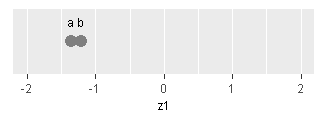

In [22]:
distance_a_b = abs(data[1,"z1"] - data[2,"z1"])
data.frame(distance_a_b)

output_size(2.7,1)
ggplot(data[1:2,]) + xlim(-2,2) + 
geom_segment(x=data[1,"z1"], y=0, xend=data[2,"z1"], yend=0) +
geom_point(aes(x=z1, y=0), color="gray50") +
geom_text(aes(x=z1, y=0, label=name)) +
theme.x_axis_only + theme.no_legend
output_size(restore)

The Euclidean distance based on 2 variables between 2 observations is derived from the familiar Pythagorean Theorem.  Here the distance based on **z1** and **z2** between the 2 observations named **a** and **b** is 1.54.

$
distance = \, \sqrt{ (b_{z_1} - a_{z_1})^2 + (b_{z_2} - a_{z_2})^2 }
$

distance_a_b
1 1.542122

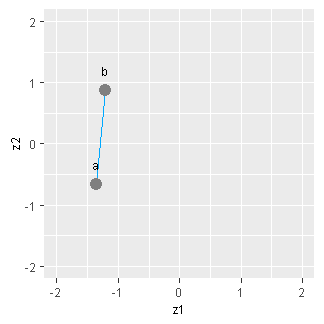

In [23]:
distance_a_b = sqrt((data[1,"z1"]-data[2,"z1"])^2 + (data[1,"z2"]-data[2,"z2"])^2)
data.frame(distance_a_b)

output_size(2.7, 2.7)
ggplot(data[1:2,]) + xlim(-2,2) + ylim(-2,2) +
geom_segment(x=data[1,"z1"], y=data[1,"z2"], xend=data[2,"z1"], yend=data[2,"z2"]) +
geom_point(aes(x=z1, y=z2), color="gray50") +
geom_text(aes(x=z1, y=z2, label=name)) +
theme.no_legend
output_size(restore)

The Euclidean distance based on 3 variables between 2 observations is derived from an extension of the Pythagorean Theorem into 3 dimensions.  Here the distance based on **z1**, **z2**, and **z3** between the 2 observations named **a** and **b** is 1.56.  So, the dissimilarity between observations 1 and 2 is 1.56.

$
distance = \, \sqrt{ (b_{z_1} - a_{z_1})^2 + (b_{z_2} - a_{z_2})^2 + (b_{z_3} - a_{z_3})^2 }
$

In [24]:
distance_a_b = sqrt((data[1,"z1"]-data[2,"z1"])^2 + (data[1,"z2"]-data[2,"z2"])^2 + (data[1,"z3"]-data[2,"z3"])^2)
data.frame(distance_a_b)

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[1:2,c("z1","z2","z3")], type="s", size=10, col="gray50", xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
segments3d(data[1:2,"z1"], data[1:2,"z2"], data[1:2,"z3"], lwd=4, col=PALETTE[1])
grid3d(c("x","y","z"))
rglwidget(width=300, height=300, reuse=FALSE)

distance_a_b
1 1.558427

HTML widgets cannot be represented in plain text (need html)

In general, the Euclidean distance based on multiple variables is derived from an extension of the Pythagorean Theorem into multiple dimensions.  It may be difficult (and not very useful) to picture what 4- or 5- or higher-dimensional distances look like, but it is easy enough to calculate them. 

$
distance = \, \sqrt{ (b_{z_1} - a_{z_1})^2 + (b_{z_2} - a_{z_2})^2 \, + \, ... \, + \, (b_{z_n} - a_{z_n})^2 }
$

## Evaluation of a Cluster Model

We are ready to evaluate a cluster model now that we can measure the dissimilarity between any pair of observations as the distance between them.

### Data

Consider this 4-class cluster model.  The **class** variable indicates how the observations have been assigned to clusters.

In [25]:
fmt(data)

data 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A 
 
 
 d 
 6.5 
 11.0 
 2.0 
 -0.0185787 
 1.4302878 
 -1.0820414 
 B 
 
 
 e 
 8.0 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.1944613 
 C 
 
 
 f 
 9.0 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.3068812 
 C 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.0218278 
 -0.5232760 
 0.6042569 
 D 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.1704574 
 0.4535059 
 0.9415165 
 D

### Intracluster Dispersion

Intracluster dispersion is a measure of how dissimilar observations are from each other within a cluster.  It is calculated as the mean of the distances between each pair of observations within a cluster.

Here we calculate the intracluster dispersion for each cluster in the cluster model.

**Cluster A:**

In [26]:
data.A = data[data$class=="A",]
fmt(data.A)

data.A 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A

In [27]:
distance_semimatrix.A = dist(data.A[,c("z1","z2","z3")])
distance_matrix.A = as.matrix(dist(data.A[,c("z1","z2","z3")]))

layout(fmt(distance_matrix.A, row.names=TRUE),
       fmt(data.frame(observation_pair=c("a_b","a_c","b_c"), distance=c(distance_matrix.A[1,2], distance_matrix.A[1,3], distance_matrix.A[2,3])), title="distance"),
       fmt(data.frame(cluster="A", intracluster_dispersion=mean(distance_semimatrix.A)), title=NA, force=TRUE))

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data.A[,c("z1","z2","z3")], type="s", radius=0.15, col=PALETTE[1], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
segments3d(data.A[c(1,2),"z1"], data.A[c(1,2),"z2"], data.A[c(1,2),"z3"], lwd=4, col=PALETTE[1])
segments3d(data.A[c(2,3),"z1"], data.A[c(2,3),"z2"], data.A[c(2,3),"z3"], lwd=4, col=PALETTE[1])
segments3d(data.A[c(3,1),"z1"], data.A[c(3,1),"z2"], data.A[c(3,1),"z3"], lwd=4, col=PALETTE[1])
grid3d(c("x","y","z"))
rglwidget(width=300, height=300, reuse=FALSE)

distance_matrix.A 
 
 
 
 1 
 2 
 3 
 
 
 
 
 1 
 0.000000 
 1.5584267 
 1.5209335 
 
 
 2 
 1.558427 
 0.0000000 
 0.5762223 
 
 
 3 
 1.520933 
 0.5762223 
 0.0000000 
 
 
 
 distance 
 
 
 observation_pair 
 distance 
 
 
 
 
 a_b 
 1.5584267 
 
 
 a_c 
 1.5209335 
 
 
 b_c 
 0.5762223 
 
 
 
   
 
 
 cluster 
 intracluster_dispersion 
 
 
 
 
 A 
 1.218527

HTML widgets cannot be represented in plain text (need html)

**Cluster B:**

In [28]:
data.B = data[data$class=="B",]
fmt(data.B)

data.B 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 d 
 6.5 
 11 
 2 
 -0.0185787 
 1.430288 
 -1.082041 
 B

In [29]:
distance_matrix.B = as.matrix(dist(data.B[,c("z1","z2","z3")]))

layout(fmt(distance_matrix.B, row.names=TRUE),
       fmt(data.frame(cluster="B", intracluster_dispersion=0), title=NA, force=TRUE))

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data.B[,c("z1","z2","z3")], type="s", radius=0.15, col=PALETTE[2], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
grid3d(c("x","y","z"))
rglwidget(width=300, height=300, reuse=FALSE)

distance_matrix.B 
 
 
 
 4 
 
 
 
 
 4 
 0 
 
 
 
   
 
 
 cluster 
 intracluster_dispersion 
 
 
 
 
 B 
 0

HTML widgets cannot be represented in plain text (need html)

**Cluster C:**

In [30]:
data.C = data[data$class=="C",]
fmt(data.C)

data.C 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 e 
 8 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.194461 
 C 
 
 
 f 
 9 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.306881 
 C

In [31]:
distance_semimatrix.C = dist(data.C[,c("z1","z2","z3")])
distance_matrix.C = as.matrix(dist(data.C[,c("z1","z2","z3")]))

layout(fmt(distance_matrix.C, row.names=TRUE),
       fmt(data.frame(observation_pair="e_f", distance=c(distance_matrix.C[1,2])), title="distance"),
       fmt(data.frame(cluster="C", intracluster_dispersion=mean(distance_semimatrix.C)), title=NA, force=TRUE))

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data.C[,c("z1","z2","z3")], type="s", radius=0.15, col=PALETTE[3], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
segments3d(data.C[c(1,2),"z1"], data.C[c(1,2),"z2"], data.C[c(1,2),"z3"], lwd=4, col=PALETTE[3])
grid3d(c("x","y","z"))
rglwidget(width=300, height=300, reuse=FALSE)

distance_matrix.C 
 
 
 
 5 
 6 
 
 
 
 
 5 
 0.0000000 
 0.5255897 
 
 
 6 
 0.5255897 
 0.0000000 
 
 
 
 distance 
 
 
 observation_pair 
 distance 
 
 
 
 
 e_f 
 0.5255897 
 
 
 
   
 
 
 cluster 
 intracluster_dispersion 
 
 
 
 
 C 
 0.5255897

HTML widgets cannot be represented in plain text (need html)

**Cluster D:**

In [32]:
data.D = data[data$class=="D",]
fmt(data.D)

data.D 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.021828 
 -0.5232760 
 0.6042569 
 D 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.170457 
 0.4535059 
 0.9415165 
 D

In [33]:
distance_semimatrix.D = dist(data.D[,c("z1","z2","z3")])
distance_matrix.D = as.matrix(dist(data.D[,c("z1","z2","z3")]))

layout(fmt(distance_matrix.D, row.names=TRUE),
       fmt(data.frame(observation_pair="g_h", distance=c(distance_matrix.C[1,2])), title="distance"),
       fmt(data.frame(cluster="D", intracluster_dispersion=mean(distance_semimatrix.D)), title=NA, force=TRUE))

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data.D[,c("z1","z2","z3")], type="s", radius=0.15, col=PALETTE[4], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
segments3d(data.D[c(1,2),"z1"], data.D[c(1,2),"z2"], data.D[c(1,2),"z3"], lwd=4, col=PALETTE[4])
grid3d(c("x","y","z"))
rglwidget(width=300, height=300, reuse=FALSE)

distance_matrix.D 
 
 
 
 7 
 8 
 
 
 
 
 7 
 0.000000 
 1.044001 
 
 
 8 
 1.044001 
 0.000000 
 
 
 
 distance 
 
 
 observation_pair 
 distance 
 
 
 
 
 g_h 
 0.5255897 
 
 
 
   
 
 
 cluster 
 intracluster_dispersion 
 
 
 
 
 D 
 1.044001

HTML widgets cannot be represented in plain text (need html)

### Mean Intracluster Dispersion ... (that's INTRA)

Mean intracluster dispersion is a measure of how dissimilar observations are from each other within a cluster across all clusters.  It is calculated as the mean of the intracluster dispersions of all clusters in the cluster model.

Here we calculate the mean intracluster dispersion of the cluster model.

In [34]:
summary = data.frame(class=c("A","B","C","D"),
                     intracluster_dispersion=c(mean(dist(data.A[,c("z1","z2","z3")])),
                                               0,
                                               mean(dist(data.C[,c("z1","z2","z3")])),
                                               mean(dist(data.D[,c("z1","z2","z3")]))))

mean_intracluster_dispersion=mean(summary$intracluster_dispersion)

layout(summary,fmt(mean_intracluster_dispersion))

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("z1","z2","z3")], type="s", col=PALETTE[c(1,1,1,2,3,3,4,4)], xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
segments3d(data[c(1,2),"z1"], data[c(1,2),"z2"], data[c(1,2),"z3"], lwd=4, col=PALETTE[1])
segments3d(data[c(2,3),"z1"], data[c(2,3),"z2"], data[c(2,3),"z3"], lwd=4, col=PALETTE[1])
segments3d(data[c(3,1),"z1"], data[c(3,1),"z2"], data[c(3,1),"z3"], lwd=4, col=PALETTE[1])
segments3d(data[c(5,6),"z1"], data[c(5,6),"z2"], data[c(5,6),"z3"], lwd=4, col=PALETTE[3])
segments3d(data[c(7,8),"z1"], data[c(7,8),"z2"], data[c(7,8),"z3"], lwd=4, col=PALETTE[4])
grid3d(c("x","y","z"))
rglwidget(width=300, height=300, reuse=FALSE)

class 
 intracluster_dispersion 
 
 
 
 
 A 
 1.2185275 
 
 
 B 
 0.0000000 
 
 
 C 
 0.5255897 
 
 
 D 
 1.0440008 
 
 
 
 
 
 mean_intracluster_dispersion 
 
 
 
 
 0.6970295

HTML widgets cannot be represented in plain text (need html)

### Mean Intercluster Dispersion ... (that's INTER)
 
Mean intercluster dispersion is a measure of how dissimilar clusters are from each other.  It is calculated as the mean of the distances between each pair of clusters in the cluster model.  To do so, we need to extend the notion of distance between observations to a notion of distance between clusters.  There are several ways we could do this, but we will usually calculate distance between 2 clusters as the distance between their centroids.

Here we calculate the mean intercluster dispersion of the cluster model.  First, for each cluster, we determine its centroid derived from the means of its relevant variables.

In [35]:
centroid.A = as.data.frame(t(colMeans(data.A[,c("z1","z2","z3")])))
centroid.B = as.data.frame(t(colMeans(data.B[,c("z1","z2","z3")])))
centroid.C = as.data.frame(t(colMeans(data.C[,c("z1","z2","z3")])))
centroid.D = as.data.frame(t(colMeans(data.D[,c("z1","z2","z3")])))

layout(fmt(data.A), fmt(centroid.A),
       fmt(data.B), fmt(centroid.B),
       fmt(data.C), fmt(centroid.C),
       fmt(data.D), fmt(centroid.D), nrow=4)

data.A 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 a 
 2.0 
 3.5 
 10.0 
 -1.3562442 
 -0.6628163 
 0.7166768 
 A 
 
 
 b 
 2.5 
 9.0 
 9.0 
 -1.2076147 
 0.8721267 
 0.4918370 
 A 
 
 
 c 
 4.0 
 8.5 
 10.5 
 -0.7617262 
 0.7325864 
 0.8290967 
 A 
 
 
 
 centroid.A 
 
 
 z1 
 z2 
 z3 
 
 
 
 
 -1.108528 
 0.3139656 
 0.6792035 
 
 
 
 data.B 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 d 
 6.5 
 11 
 2 
 -0.0185787 
 1.430288 
 -1.082041 
 B 
 
 
 
 centroid.B 
 
 
 z1 
 z2 
 z3 
 
 
 
 
 -0.0185787 
 1.430288 
 -1.082041 
 
 
 
 data.C 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 e 
 8 
 2.5 
 1.5 
 0.4273098 
 -0.9418969 
 -1.194461 
 C 
 
 
 f 
 9 
 1.0 
 1.0 
 0.7245688 
 -1.3605177 
 -1.306881 
 C 
 
 
 
 centroid.C 
 
 
 z1 
 z2 
 z3 
 
 
 
 
 0.5759393 
 -1.151207 
 -1.250671 
 
 
 
 data.D 
 
 
 name 
 x1 
 x2 
 x3 
 z1 
 z2 
 z3 
 class 
 
 
 
 
 g 
 10.0 
 4.0 
 9.5 
 1.021828 
 -0.5232760 
 0.6042569 
 D 
 
 
 h 
 10.5 
 7.5 
 11.0 
 1.170457 
 0.4535059 
 0.9415165 
 D 
 
 
 
 centroid.D 
 
 
 z1 
 z2 
 z3 
 
 
 
 
 1.096143 
 -0.0348851 
 0.7728867

In [36]:
centroid = cbind(class=c("A","B","C","D"), rbind(t(colMeans(data.A[,c("z1","z2","z3")])),
                                                 t(colMeans(data.B[,c("z1","z2","z3")])),
                                                 t(colMeans(data.C[,c("z1","z2","z3")])),
                                                 t(colMeans(data.D[,c("z1","z2","z3")]))))
fmt(centroid)

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("z1","z2","z3")], type="s", radius=0.15, col=PALETTE[c(1,1,1,2,3,3,4,4)], alpha=0.2, xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
spheres3d(centroid[,c("z1","z2","z3")], radius=0.15, col=PALETTE[1:4])
grid3d(c("x","y","z"))
rglwidget(width=300, height=300, reuse=FALSE)

centroid 
 
 
 class 
 z1 
 z2 
 z3 
 
 
 
 
 A 
 -1.10852839212304 
 0.313965617387082 
 0.679203474677539 
 
 
 B 
 -0.0185786881361403 
 1.43028781254115 
 -1.08204139758973 
 
 
 C 
 0.575939332220349 
 -1.15120726375263 
 -1.25067122578554 
 
 
 D 
 1.09614260003228 
 -0.0348850685985647 
 0.772886712564096

HTML widgets cannot be represented in plain text (need html)

Then we determine the distances between the centroids, and the mean of those distances.

In [37]:
distance_matrix.centroid = as.matrix(dist(centroid[,c("z1","z2","z3")]))
colnames(distance_matrix.centroid) = c("A","B","C","D")
rownames(distance_matrix.centroid) = c("A","B","C","D")

distance = data.frame(cluster_pair=c("A_B", "A_C", "A_D", "B_C", "B_D", "C_D"),
                      distance=c(distance_matrix.centroid[1,2],
                                 distance_matrix.centroid[1,3],
                                 distance_matrix.centroid[1,4],
                                 distance_matrix.centroid[2,3],
                                 distance_matrix.centroid[2,4],
                                 distance_matrix.centroid[3,4]))

mean_intercluster_dispersion = mean(dist(centroid[,c("z1","z2","z3")]))

layout(fmt(distance_matrix.centroid, row.names=TRUE), fmt(distance), fmt(mean_intercluster_dispersion, force=TRUE))

distance_matrix.centroid 
 
 
 
 A 
 B 
 C 
 D 
 
 
 
 
 A 
 0.000000 
 2.352902 
 2.951030 
 2.234065 
 
 
 B 
 2.352902 
 0.000000 
 2.654431 
 2.613445 
 
 
 C 
 2.951030 
 2.654431 
 0.000000 
 2.368876 
 
 
 D 
 2.234065 
 2.613445 
 2.368876 
 0.000000 
 
 
 
 distance 
 
 
 cluster_pair 
 distance 
 
 
 
 
 A_B 
 2.352902 
 
 
 A_C 
 2.951030 
 
 
 A_D 
 2.234065 
 
 
 B_C 
 2.654431 
 
 
 B_D 
 2.613445 
 
 
 C_D 
 2.368876 
 
 
 
   
 
 
 mean_intercluster_dispersion 
 
 
 
 
 2.529125

In [38]:
p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("z1","z2","z3")], type="s", radius=0.15, col=PALETTE[c(1,1,1,2,3,3,4,4)], alpha=0.2, xlim=c(-2,2), ylim=c(-2,2), zlim=c(-2,2))
spheres3d(centroid[,c("z1","z2","z3")], radius=0.15, col=PALETTE[1:4])
segments3d(centroid[c(1,2),"z1"], centroid[c(1,2),"z2"], centroid[c(1,2),"z3"], lwd=4, col="gray50")
segments3d(centroid[c(2,3),"z1"], centroid[c(2,3),"z2"], centroid[c(2,3),"z3"], lwd=4, col="gray50")
segments3d(centroid[c(3,4),"z1"], centroid[c(3,4),"z2"], centroid[c(3,4),"z3"], lwd=4, col="gray50")
segments3d(centroid[c(4,1),"z1"], centroid[c(4,1),"z2"], centroid[c(4,1),"z3"], lwd=4, col="gray50")
segments3d(centroid[c(1,3),"z1"], centroid[c(1,3),"z2"], centroid[c(1,3),"z3"], lwd=4, col="gray50")
segments3d(centroid[c(1,4),"z1"], centroid[c(1,4),"z2"], centroid[c(1,4),"z3"], lwd=4, col="gray50")
segments3d(centroid[c(2,4),"z1"], centroid[c(2,4),"z2"], centroid[c(2,4),"z3"], lwd=4, col="gray50")
grid3d(c("x","y","z"))
rglwidget(width=300, height=300, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

### Dispersion Ratio

Dispersion ratio is a measure of both how dissimilar observations are from each other within a cluster and how dissimilar clusters are from each other.  It is calculated as the mean intercluster dispersion divided by the mean intracluster dispersion.

Here we calculate the dispersion ratio of the cluster model.

In [39]:
dispersion_ratio = mean_intercluster_dispersion / mean_intracluster_dispersion
data.frame(mean_intracluster_dispersion, mean_intercluster_dispersion, dispersion_ratio)

mean_intracluster_dispersion mean_intercluster_dispersion dispersion_ratio
1 0.6970295                    2.529125                     3.628433

### Summary of Calculations


$
\begin{aligned}
intracluster\,dispersion = mean(dist_{1,2},\,dist_{1,3},\,dist_{1,4},\,...,\,dist_{1,n},\,dist_{2,3},\,dist_{2,4},\,...,\,dist_{2,n},\,...,\,dist_{n-1,n})
\end{aligned}
$
* $dist_{x,y}$ is the distance between <u>observations</u> $x$ and $y$
* $n$ is the number of observations

$
\begin{aligned}
mean\,intracluster\,dispersion = mean(intracluster\,dispersion_A,\,intracluster\,dispersion_B,\,...,\,intracluster\,dispersion_N)
\end{aligned}
$
* $A$, $B$, ... are unique class values (cluster names)
* $N$ is the last unique class value (cluster names)

$
\begin{aligned}
mean\,intercluster\,dispersion = mean(dist_{1,2},\,dist_{1,3},\,dist_{1,4},\,...,\,dist_{1,n},\,dist_{2,3},\,dist_{2,4},\,...,\,dist_{2,n},\,...,\,dist_{n-1,n})
\end{aligned}
$
* $dist_{x,y}$ is the distance between <u>clusters</u> $x$ and $y$
* $n$ is the number of clusters

$
\begin{aligned}
dispersion\,ratio = \frac{mean\,intercluster\,dispersion}{mean\,intracluster\,dispersion}
\end{aligned}
$

### Quality Metrics

Here are some popular quality metrics for cluster models that can be derived from a mean intracluster dispersion and a mean intercluster dispersion.  Note that in our discourse we will usually, but not always, use the dispersion ratio.

* **Mean Intracluster Dispersion:**<br>
Average dissimilarity within clusters<br><br>
* **Mean Intercluster Dispersion:**<br>
Average dissimilarity between clusters<br><br>
* **Dispersion Ratio:**<br>
Average dissimilarity between clusters as compared to average dissimilarity within clusters<br><br>
* **Akaike Information Criterion (AIC):** <br>
Likelihood that the cluster model represents the underlying process; derived from the mean intracluster dispersion and mean intercluster dispersion<br><br>
* **Bayesian Information Criterion (BIC):** <br>
Likelihood that the cluster model more closely represents the underlying process than any other cluster model does; derived from the mean intracluster dispersion and mean intercluster dispersion<br><br>
* **Mallow's Cp:** <br>
Special case of Akaike Information Criterion

### More About Evaluation of a Cluster Model

Note that intracluster dispersion is a mean of distances.  Mean intracluster dispersion is a mean of means of distances.  Mean intercluster dispersion is a mean of distances.

Note that a large dispersion ratio implies that observations within a cluster tend to be more similar to each other than they are to observations in other clusters.  Conversely, a small dispersion ratio implies that observations within a cluster are not any more similar to each other than they are to observations in other clusters.  In many business applications, the goal is to construct cluster models with large dispersion ratios.

Here are some popular approaches to calculating distance between 2 clusters.  Note that in our discourse we will usually use the centroid linkage approach. 

* **Centroid Linkage:**<br>
The distance between 2 clusters is the distance between their centroids<br><br>
* **Single Linkage:**<br>
The distance between 2 clusters is the closest distance between an observation in one cluster and an obserrvation in the other cluster<br><br>
* **Complete Linkage:**<br>
The distance between 2 clusters is the farthest distance between an observation in one cluster and an obserrvation in the other cluster<br><br>
* **Average Linkage:**<br>
The distance between clusters is the mean distance between every pair of observations, where one observation is in one cluster and the other observation is in the other cluster

## Business Value

To really be useful, evaluation of the quality of a cluster model should say something about its business value.  So, construct a decision model to transform quality metric values to business value.  The decision model should accept business parameter values and one or more quality metric values as inputs, do some calculations regarding the effects of various decisions in the context of the input values, and produce a measure of expected business value as output.

Imagine planning some product advertising campaigns.  You have budget enough for only 2 campaigns.  Further, you can expect a campaign to be more effective if designed for and presented to a group of homogeneous customers, and less effective if presented to a group of diverse customers.  So, you construct a 2-class cluster model based on customer demographics to segment the market, partitioning customers into 2 groups hopefully in such a way that each group is highly homogeneous.  For each group, calculate the intracluster dispersion as a measure of how homogeneous it is.  Then, in combination with assumptions about maximum potential campaign effectiveness, total number of customers, product pricing, and other business parameters, calculate expected product adoption and revenue.  Compare that to expected product adoption and revenue were the market segmented some other way.  You now know the business value of the cluster model.

## Sensitivity Analysis

Before proceeding with a business decision influenced by your estimate of business value, you may want to test how sensitive your estimate is to the business parameters. If large changes to business parameter values would only minimally affect your estimate of business value, then you can have confidence in you business decision.  Conversely, if small changes to business parameter values would greatly affect your estimate of business value, then you face increased risk around your business decision.

Imagine your estimate of product adoption would differ by 90% if product pricing differed by only 1%.  In this situation, if you are making your business decision counting on a certain level of product adoption and you do not have control over product pricing, then this is indeed a risky (and perhaps even irresponsible) business decision.

## Code

Here are some R functions used in our discourse and some R code templates that you can modify and use in your own analyses.

### Useful Functions

In [40]:
# help(cutree)       # from stats library
# help(colMeans)     # from base library
# help(dist)         # from stats library
# help(ggdendrogram) # from ggplot2 library
# help(hclust)       # from stats library
# help(kmeans)       # from stats library
# help(Mclust)       # from mclust library
# help(scale)        # from base library
# help(setNames)     # from stats library
# help(set.seed)     # from base library
# help(t)            # from base library

### Templates

In [41]:
# Construct cluster model using Gaussian mixture model by expectation-maximization

datax = data.frame(x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))

number_of_classes = 5

set.seed(12345)
datax$class = Mclust(datax, G=number_of_classes)$classification
fmt(datax)

datax 
 
 
 x1 
 x2 
 x3 
 class 
 
 
 
 
 2.0 
 3.5 
 10.0 
 1 
 
 
 2.5 
 9.0 
 9.0 
 2 
 
 
 4.0 
 8.5 
 10.5 
 2 
 
 
 6.5 
 11.0 
 2.0 
 3 
 
 
 8.0 
 2.5 
 1.5 
 4 
 
 
 9.0 
 1.0 
 1.0 
 4 
 
 
 10.0 
 4.0 
 9.5 
 5 
 
 
 10.5 
 7.5 
 11.0 
 5

In [42]:
# Construct cluster model using hierarchical agglomeration

datax = data.frame(x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
datax.norm = scale(datax)

number_of_classes = 5

datax$classes = cutree(hclust(dist(datax.norm), method="complete"), k=number_of_classes)
fmt(datax)

datax 
 
 
 x1 
 x2 
 x3 
 classes 
 
 
 
 
 2.0 
 3.5 
 10.0 
 1 
 
 
 2.5 
 9.0 
 9.0 
 2 
 
 
 4.0 
 8.5 
 10.5 
 2 
 
 
 6.5 
 11.0 
 2.0 
 3 
 
 
 8.0 
 2.5 
 1.5 
 4 
 
 
 9.0 
 1.0 
 1.0 
 4 
 
 
 10.0 
 4.0 
 9.5 
 5 
 
 
 10.5 
 7.5 
 11.0 
 5

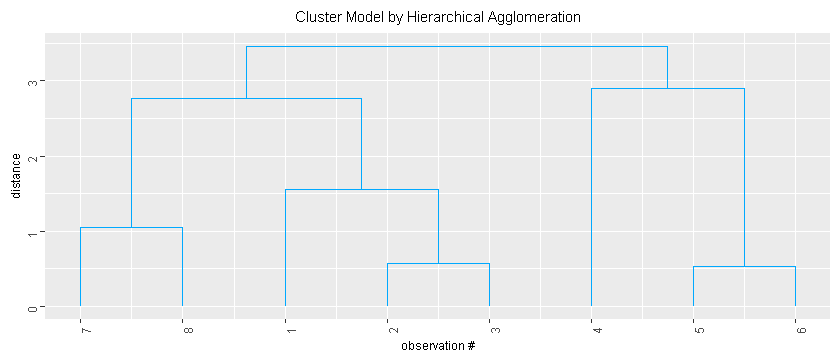

In [43]:
# Visualize the dendrogram associated with hierarchical agglomeration

datax = data.frame(x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
datax.norm = scale(datax)

tree = hclust(dist(datax.norm), method="complete")
ggdendrogram(tree, theme_dendro=FALSE) + xlab("observation #") + ylab("distance") + ggtitle("Cluster Model by Hierarchical Agglomeration")

In [44]:
# Construct cluster model using k-means

datax = data.frame(x1=c(2,2.5,4,6.5,8,9,10,10.5), x2=c(3.5,9,8.5,11,2.5,1,4,7.5), x3=c(10,9,10.5,2,1.5,1,9.5,11))
datax.norm = scale(datax)

number_of_classes = 5

set.seed(12345)
datax$class = kmeans(datax.norm, number_of_classes, nstart=1000)$cluster
fmt(datax, "Cluster Model by k-Means")

Cluster Model by k-Means 
 
 
 x1 
 x2 
 x3 
 class 
 
 
 
 
 2.0 
 3.5 
 10.0 
 5 
 
 
 2.5 
 9.0 
 9.0 
 1 
 
 
 4.0 
 8.5 
 10.5 
 1 
 
 
 6.5 
 11.0 
 2.0 
 4 
 
 
 8.0 
 2.5 
 1.5 
 2 
 
 
 9.0 
 1.0 
 1.0 
 2 
 
 
 10.0 
 4.0 
 9.5 
 3 
 
 
 10.5 
 7.5 
 11.0 
 3

## What You Should Now Know

* Applications of cluster models.
* How different cluster model construction methods can result in different cluster models.
* How the same cluster model construction method can result in different cluster models.
* The effect of multiple variables on cluster models.
* How to construct a cluster model using gaussian mixture model estimation, hierarchical agglomeration, and kmeans, using R.
* How to visualization a dendrogram associated with hierarchical agglomeration, using R.
* How to calculate mean intracluster diffusion, mean intercluster diffusion, and diffusion ratio, conceptually and using R.
* How to evaluate the quality of cluster models in terms of observation similarity/dissimilarity and in terms of business value.
* How to explore the sensitivity of business parameter values to the business value of a cluster model.

## Further Reading

* http://www.business-science.io/business/2016/08/07/CustomerSegmentationPt1.html
* _More further reading coming soon..._

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised March 7, 2021
</span>
</p>